# 2. Basic flow with a stationary body
In this notebook we will simulate the flow past a stationary body.

In [3]:
using ViscousFlow

┌ Info: Precompiling ViscousFlow [103da179-b3e4-57c1-99a4-586354eb2c5a]
└ @ Base loading.jl:1260


In [4]:
using Plots

### The basic steps
From the previous notebook, we add one additional step:
* **Specify the problem**: Set the Reynolds number and free stream
* **Discretize**: Set up a solution domain, grid cell size, time step size
* ***Set up bodies***: *Create the body or bodies and specify their motions, if any*
* **Construct the system structure**: Create the operators that will be used to perform the simulation
* **Initialize**: Set the initial flow field and initialize the integrator
* **Solve**: Solve the flow field
* **Examine**: Examine the results

We will go through all of these here. For the examples we will carry out in this notebook, the first three steps need only be carried out once.

### Problem specification
Set the Reynolds number and free stream

In [5]:
Re = 100 # Reynolds number
U = 1.0 # Free stream velocity
U∞ = (U,0.0);

### Discretize

In [6]:
xlim = (-2.0,4.0)
ylim = (-2.0,2.0)

Δx, Δt = setstepsizes(Re,gridRe=2.0)

(0.02, 0.01)

### Set up bodies
Here, we will set up a rectangle at 45 degrees angle of attack

In [68]:
body = Rectangle(1.0,0.5,1.5Δx)

Rectangular body with 196 points and half-lengths (1.0,0.5)
   Current position: (0.0,0.0)
   Current angle (rad): 0.0


Transform the body to a specified initial position and orientation.

In [69]:
cent = (0.0,0.0) # center of body
α = 45π/180 # angle
T = RigidTransform(cent,α)
T(body) # transform the body to the current configuration

Rectangular body with 196 points and half-lengths (1.0,0.5)
   Current position: (0.0,0.0)
   Current angle (rad): 0.7853981633974483


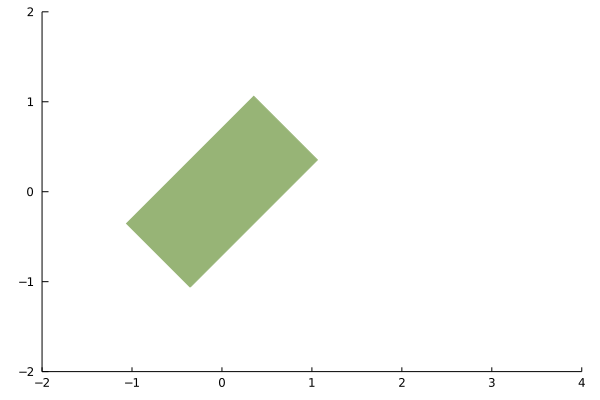

In [70]:
plot(body,xlim=xlim,ylim=ylim)

### Construct the system structure
This step is like the previous notebook, but now we also provide the body and the freestream:

In [71]:
sys = NavierStokes(Re,Δx,xlim,ylim,Δt,body,freestream = U∞)

External flow Navier-Stokes system on a grid of size 308 x 208 and 196 static immersed points
   Static freestream = (1.0, 0.0)
   1 body


### Initialize
Now, we initialize with zero vorticity

In [72]:
u0 = newstate(sys)

(Dual nodes in a (nx = 308, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 308, ny = 208), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

and create the integrator

In [73]:
tspan = (0.0,1.0)
integrator = init(u0,tspan,sys)

t: 0.0
u: (Dual nodes in a (nx = 308, ny = 208) cell grid of type Float64 data
  Number of Dual nodes: (nx = 308, ny = 208), [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0])

### Solve
Now we are ready to solve the problem. Let's advance the solution to $t = 3$:

In [74]:
step!(integrator,3.0)

### Examine
Let's look at the flow field at the end of this interval

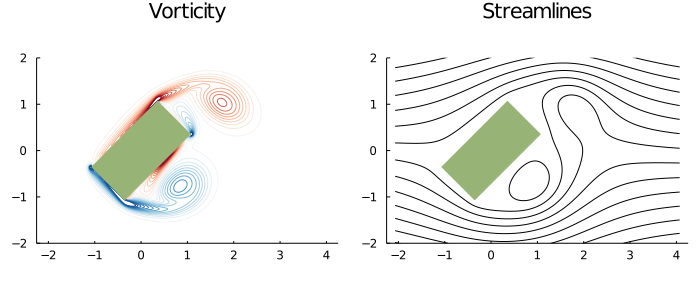

In [89]:
plot(
plot(vorticity(integrator),sys,title="Vorticity",clim=(-10,10),levels=range(-10,10,length=30), color = :RdBu,ylim=(-2,2)),
plot(streamfunction(integrator),sys,title="Streamlines",ylim=(-2,2),color = :Black),
    size=(700,300)
    )

Now let's make a movie

In [76]:
sol = integrator.sol;

┌ Info: Saved animation to 
│   fn = /Users/jeff/JuliaProjects/ViscousFlow/examples/tmp.gif
└ @ Plots /Users/jeff/.julia/packages/Plots/uCh2y/src/animation.jl:104


Plots.AnimatedGif("/Users/jeff/JuliaProjects/ViscousFlow/examples/tmp.gif")
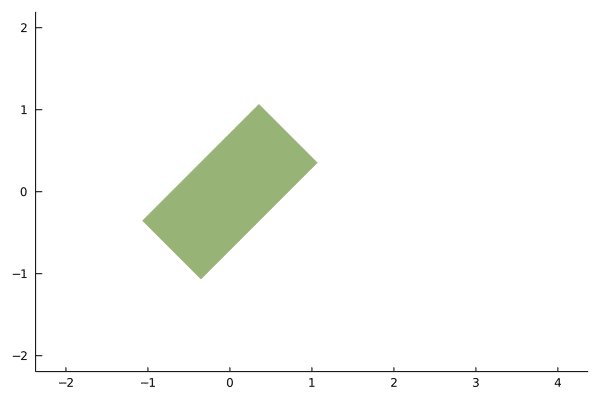

In [84]:
@gif for (u,t) in zip(sol.u,sol.t)
    plot(vorticity(u,sys,t),sys,clim=(-10,10),levels=range(-10,10,length=30), color = :RdBu)
end every 5

Compute the force history

In [79]:
fx, fy = force(sol,sys,1);

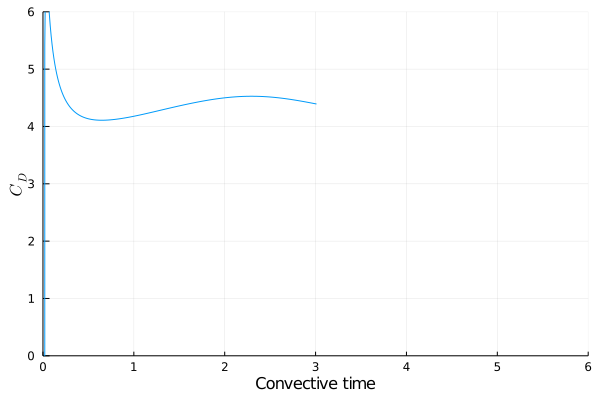

In [80]:
plot(sol.t,2*fx,xlim=(0,6),ylim=(0,6),xlabel="Convective time",ylabel="\$C_D\$",legend=:false)